In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
# Configurar el espacio de trabajo

# Cantidad de caracteres que van a mostrarse en las columnas de texto
pd.set_option('display.max_colwidth', 100)

# Definir la cantidad de numero decimales permitidos
pd.set_option('display.precision', 2)

In [3]:
# Abrir la tabla de datos
nba2k = pd.read_csv(r'nba\nba2020.csv', encoding_errors = 'ignore')

In [4]:
nba2k

,Unnamed: 0,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,1,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,4,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,5,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,Kevin Durant,95,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$40918900,USA,2007,1,2,Texas,NBA2k21
435,436,Anthony Davis,95,#3,Los Angeles Lakers,F-C,03/11/93,6-10 / 2.08,222 lbs. / 100.7 kg.,$35361360,USA,2012,1,1,Kentucky,NBA2k21
436,437,Luka Doncic,94,#77,Dallas Mavericks,G-F,02/28/99,6-7 / 2.01,227 lbs. / 103 kg.,$10174391,Slovenia,2018,1,3,NaN,NBA2k21
437,438,Damian Lillard,94,#0,Portland Trail Blazers,G,07/15/90,6-2 / 1.88,195 lbs. / 88.5 kg.,$39344900,USA,2012,1,6,Weber State,NBA2k21


In [5]:
nba2k['version'].unique()

array(['NBA2k20', 'NBA2k21'], dtype=object)

In [6]:
nba2k[nba2k['version'] == 'NBA2k21']

,Unnamed: 0,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
429,430,LeBron James,97,#6,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$41180544,USA,2003,1,1,NaN,NBA2k21
430,431,Giannis Antetokounmpo,97,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$39344900,Greece,2013,1,15,NaN,NBA2k21
431,432,Kawhi Leonard,96,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$39344900,USA,2011,1,15,San Diego State,NBA2k21
432,433,James Harden,96,#13,Brooklyn Nets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$44310840,USA,2009,1,3,Arizona State,NBA2k21
433,434,Stephen Curry,95,#30,Golden State Warriors,G,03/14/88,6-3 / 1.91,185 lbs. / 83.9 kg.,$45780966,USA,2009,1,7,Davidson,NBA2k21
434,435,Kevin Durant,95,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$40918900,USA,2007,1,2,Texas,NBA2k21
435,436,Anthony Davis,95,#3,Los Angeles Lakers,F-C,03/11/93,6-10 / 2.08,222 lbs. / 100.7 kg.,$35361360,USA,2012,1,1,Kentucky,NBA2k21
436,437,Luka Doncic,94,#77,Dallas Mavericks,G-F,02/28/99,6-7 / 2.01,227 lbs. / 103 kg.,$10174391,Slovenia,2018,1,3,NaN,NBA2k21
437,438,Damian Lillard,94,#0,Portland Trail Blazers,G,07/15/90,6-2 / 1.88,195 lbs. / 88.5 kg.,$39344900,USA,2012,1,6,Weber State,NBA2k21
438,439,Joel Embiid,91,#21,Philadelphia 76ers,C,03/16/94,7-0 / 2.13,250 lbs. / 113.4 kg.,$31579390,Cameroon,2014,1,3,Kansas,NBA2k21


### Corregir los registros de la tabla original

In [7]:
# Existen algunos registros duplicados (nombres de jugadores), porque la tabla tiene datos cargados
# de los anos 2020 y 2021. Como son solo 10 registros, vamos a realizar un filtro, quedarnos unicamente
# con los registros del ano 2020
nba2k = nba2k[nba2k['version'] == 'NBA2k20']

In [8]:
nba2k

,Unnamed: 0,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,1,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,4,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,5,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,425,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast,NBA2k20
425,426,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,Florida,NBA2k20
426,427,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,Dayton,NBA2k20
427,428,Jalen Lecque,68,#0,Phoenix Suns,G,06/13/00,6-3 / 1.91,190 lbs. / 86.2 kg.,$898310,USA,2019,Undrafted,Undrafted,NaN,NBA2k20


### 1. Consulta general de informacion

In [9]:
# Tamano de la tabla
nba2k.shape

(429, 16)

In [10]:
# Nombre de las columnas
nba2k.columns

Index(['Unnamed: 0', 'full_name', 'rating', 'jersey', 'team', 'position',
       'b_day', 'height', 'weight', 'salary', 'country', 'draft_year',
       'draft_round', 'draft_peak', 'college', 'version'],
      dtype='object')

In [11]:
# Otra forma de ver los nombres de las columnas
list(nba2k.columns.values)

['Unnamed: 0',
 'full_name',
 'rating',
 'jersey',
 'team',
 'position',
 'b_day',
 'height',
 'weight',
 'salary',
 'country',
 'draft_year',
 'draft_round',
 'draft_peak',
 'college',
 'version']

In [12]:
# Tipos de datos
# Observamos que muchos datos que deberian ser int o float aparecen como object, como por ejemplo: jersey, height, salary
nba2k.dtypes

Unnamed: 0      int64
full_name      object
rating          int64
jersey         object
team           object
position       object
b_day          object
height         object
weight         object
salary         object
country        object
draft_year      int64
draft_round    object
draft_peak     object
college        object
version        object
dtype: object

In [13]:
# Consulta mas especifica de los datos, nos indica cuantos registros hay de cada columna
# Por ejemplo: la tabla tiene 429 registros, pero la columna "team" solo tiene 406. Eso quiere decir, que esa columna
# tiene valores nulos
nba2k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 428
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   429 non-null    int64 
 1   full_name    429 non-null    object
 2   rating       429 non-null    int64 
 3   jersey       429 non-null    object
 4   team         406 non-null    object
 5   position     429 non-null    object
 6   b_day        429 non-null    object
 7   height       429 non-null    object
 8   weight       429 non-null    object
 9   salary       429 non-null    object
 10  country      429 non-null    object
 11  draft_year   429 non-null    int64 
 12  draft_round  429 non-null    object
 13  draft_peak   429 non-null    object
 14  college      363 non-null    object
 15  version      429 non-null    object
dtypes: int64(3), object(13)
memory usage: 57.0+ KB


In [14]:
# Descripcion de la informacion de la tabla, y algunas medidas de variables numericas
nba2k.describe(include = 'all')

,Unnamed: 0,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
count,429.00,429,429.00,429,406,429,429,429,429,429,429,429.00,429,429,363,429
unique,NaN,429,NaN,52,30,7,415,20,84,308,39,NaN,3,57,109,1
top,NaN,LeBron James,NaN,#0,Milwaukee Bucks,G,09/19/96,6-6 / 1.98,215 lbs. / 97.5 kg.,$1416852,USA,NaN,1,Undrafted,Kentucky,NBA2k20
freq,NaN,1,NaN,79,17,169,2,50,23,20,323,NaN,257,67,26,429
mean,215.00,NaN,76.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.09,NaN,NaN,NaN,NaN
std,123.99,NaN,5.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.94,NaN,NaN,NaN,NaN
min,1.00,NaN,67.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.00,NaN,NaN,NaN,NaN
25%,108.00,NaN,72.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.00,NaN,NaN,NaN,NaN
50%,215.00,NaN,75.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.00,NaN,NaN,NaN,NaN
75%,322.00,NaN,79.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.00,NaN,NaN,NaN,NaN


### 2. Asignar una columna como indice

In [15]:
# Si revisamos los valores unicos de la columna "Unnamed: 0", podemos observar, que existe un registro para cada jugador
# esto indica, que podemos utilizarla como indice, dando que asigna un valor unico a cada registro
nba2k['Unnamed: 0'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [16]:
# Ahora que sabemos que la columna "Unnamed: 0" tiene valores unicos, vamos asignarla como indice de la tabla
nba2k.set_index('Unnamed: 0', inplace = True)
nba2k

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
Unnamed: 0,,,,,,,,,,,,,,,
1,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
4,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
5,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast,NBA2k20
426,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,Florida,NBA2k20
427,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,Dayton,NBA2k20


In [17]:
# Como el nombre de la columna que asignamos al indice, puede ser un poco confuso. Cambiaremos el nombre de la columna
# del indice por algo mas simple como "id", con df.index.names=[‘nombre’]
nba2k.index.names=['id']
nba2k

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
id,,,,,,,,,,,,,,,
1,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
4,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
5,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast,NBA2k20
426,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,Florida,NBA2k20
427,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,Dayton,NBA2k20


### 3. Corregir los datos de las columnas

In [18]:
# Si hacemos otra revision con el atributo dtypes, podemos ver que muchas columnas de la tabla tienen problemas, 
# porque no estan asignadas al tipo de dato correcto
nba2k.dtypes

full_name      object
rating          int64
jersey         object
team           object
position       object
b_day          object
height         object
weight         object
salary         object
country        object
draft_year      int64
draft_round    object
draft_peak     object
college        object
version        object
dtype: object

In [19]:
# Las columnas que debemos corregir son: jersey, b_day, height, weight, salary, draft_round y draft_pick

### Corregir los datos de la columna 'jersey'

In [20]:
# Vemos que la columna esta en formato texto, y ademas de ello tiene un numeral #. Antes de pasar la columna
# a entero, debemos eliminar ese simbolo y luego asignar el tipo de dato
nba2k['jersey'].unique()

array(['#23', '#2', '#34', '#7', '#13', '#30', '#3', '#0', '#21', '#11',
       '#15', '#32', '#22', '#27', '#45', '#8', '#77', '#12', '#10', '#4',
       '#6', '#43', '#25', '#5', '#1', '#9', '#42', '#20', '#24', '#35',
       '#44', '#33', '#36', '#14', '#17', '#31', '#40', '#26', '#88',
       '#67', '#99', '#55', '#46', '#18', '#41', '#51', '#16', '#95',
       '#19', '#28', '#37', '#50'], dtype=object)

In [21]:
# Vamos a utilizar un metodo de string que es str.replace() y luego asignar el tipo de dato
nba2k['jersey'].str.replace("#", "", regex = True).astype(int)
# Para que se haga efectivo tenemos que sobrescribir la variable
# nba2k['jersey'] = nba2k['jersey'].str.replace("#", "", regex = True).astype(int).copy()

id
1      23
2       2
3      34
4       7
5      13
       ..
425     0
426    21
427    37
428     0
429    55
Name: jersey, Length: 429, dtype: int32

### Corregir los datos de la columnas 'b_day'

In [22]:
# Ahora vamos a corregir la columna "b_day" que esta como object y deberia estar en formato fecha
nba2k['b_day']

id
1      12/30/84
2      06/29/91
3      12/06/94
4      09/29/88
5      08/26/89
         ...   
425    10/02/95
426    03/08/94
427    11/20/97
428    06/13/00
429    04/22/94
Name: b_day, Length: 429, dtype: object

In [23]:
# Como la columna un formato de fecha que puede ser reconocido por pandas, no es necesario que establezcamos el 
# formato de forma manual, por pandas lo reconoce de forma automatica. Solo debemos aplicar la funcion: pd.to_datetime()
import datetime
nba2k['b_day'] = pd.to_datetime(nba2k['b_day']).copy()
# nba2k.loc[nba2k['b_day']] = pd.to_datetime(nba2k['b_day'])

C:\Users\equipo\AppData\Local\Temp\ipykernel_8868\457395251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba2k['b_day'] = pd.to_datetime(nba2k['b_day']).copy()


In [24]:
# Ahora podemos comprobar que el tipo de dato quedo almacenado correctamente como una fecha
nba2k['b_day']

id
1     1984-12-30
2     1991-06-29
3     1994-12-06
4     1988-09-29
5     1989-08-26
         ...    
425   1995-10-02
426   1994-03-08
427   1997-11-20
428   2000-06-13
429   1994-04-22
Name: b_day, Length: 429, dtype: datetime64[ns]

### Corregir los datos de la columna 'height'

In [25]:
# Vamos a corregir la columna "height", esta operacion tiene varios pasos
# Tenemos dos medidas diferentes, separadas por una /. Queremos solo la medida en metros-centimetros
# Asi que vamos a separarla en dos columnas y solo nos quedaremos con una de ellas
# Para ello utilizaremos el metodo "str.split()"
nba2k['height']

id
1       6-9 / 2.06
2       6-7 / 2.01
3      6-11 / 2.11
4      6-10 / 2.08
5       6-5 / 1.96
          ...     
425     6-0 / 1.83
426     6-3 / 1.91
427    6-10 / 2.08
428     6-3 / 1.91
429     6-7 / 2.01
Name: height, Length: 429, dtype: object

In [26]:
alturas = nba2k['height'].str.split('/', expand = True)

In [27]:
# Ahora tenemos dos columnas, una en pies/pulgadas y otra en metro/centimetros
# Vamos a eliminar la primera
alturas

,0,1
id,,
1,6-9,2.06
2,6-7,2.01
3,6-11,2.11
4,6-10,2.08
5,6-5,1.96
...,...,...
425,6-0,1.83
426,6-3,1.91
427,6-10,2.08


In [28]:
# Eliminar la primera columna
alturas.drop(columns=0, inplace = True)

In [29]:
# Ahora tenemos la columna con el dato correcto, pero aun aparece como object, debemos convertirlo a formato "float"
# para ello utilizaremos la funcion "astype()"
alturas[1] = alturas[1].astype(float) 

In [30]:
# El ultimo paso, es eliminar la columna "height" original, y agregar esta nueva columnas
nba2k.drop(columns = 'height', inplace = True)

C:\Users\equipo\AppData\Local\Temp\ipykernel_8868\1978423190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba2k.drop(columns = 'height', inplace = True)


In [31]:
# La columna altura, la agregamos con el metodo pd.concat()
nba2k = pd.concat([nba2k, alturas], axis=1)

In [32]:
# Ahora cambiamos el nombre de la columna, porque aparece con el nombre "1" vamos a ponerle otra vez "height"
nba2k.rename(columns = {1:'height'}, inplace = True)

In [33]:
nba2k.columns

Index(['full_name', 'rating', 'jersey', 'team', 'position', 'b_day', 'weight',
       'salary', 'country', 'draft_year', 'draft_round', 'draft_peak',
       'college', 'version', 'height'],
      dtype='object')

### Corregir los datos de la columna 'weight'

In [34]:
# La columna 'weight' tiene un problema similar a la columna 'height', pero que llevara mas tiempo resolver
# Primero debemos crear dos columnas y eliminar el separador '/', y luego nos quedaremos solo con la columna kg,
# pero debemos quitarle todos los caracteres y los espacios
nba2k['weight']

id
1      250 lbs. / 113.4 kg.
2      225 lbs. / 102.1 kg.
3      242 lbs. / 109.8 kg.
4      230 lbs. / 104.3 kg.
5       220 lbs. / 99.8 kg.
               ...         
425     180 lbs. / 81.6 kg.
426     200 lbs. / 90.7 kg.
427     200 lbs. / 90.7 kg.
428     190 lbs. / 86.2 kg.
429     215 lbs. / 97.5 kg.
Name: weight, Length: 429, dtype: object

In [35]:
pesos = nba2k['weight'].str.split('/', expand = True)

In [36]:
# Creamos la variable, pesos que contiene dos columnas, una con el peso en libras, y otra con el peso en kilos
# vamos a eliminar la primera porque no la necesitamos
pesos.drop(columns = 0, inplace = True)
pesos

,1
id,
1,113.4 kg.
2,102.1 kg.
3,109.8 kg.
4,104.3 kg.
5,99.8 kg.
...,...
425,81.6 kg.
426,90.7 kg.
427,90.7 kg.


In [37]:
# Antes de continuar vamos a cambiarle el nombre a la columna
pesos.columns = ['weight_kg']

In [38]:
# Ahora vamos a utilizar str.replace() para eliminar este texto " kg." 
pesos['weight_kg'] = pesos['weight_kg'].str.replace(" kg.", "", regex = True).astype(float) 

In [39]:
# Ya tenemos la columna sin los textos y en el formato correcto, ahora solo nos queda agregarla a nuestro data frame
# con pd.concat, pero debemos sobrescribir la tabla original
nba2k = pd.concat([nba2k, pesos], axis=1)
nba2k

,full_name,rating,jersey,team,position,b_day,weight,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
id,,,,,,,,,,,,,,,,
1,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20,2.06,113.4
2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20,2.01,102.1
3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20,2.11,109.8
4,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20,2.08,104.3
5,James Harden,96,#13,Houston Rockets,G,1989-08-26,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20,1.96,99.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Brandon Goodwin,68,#0,Atlanta Hawks,G,1995-10-02,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast,NBA2k20,1.83,81.6
426,Michael Frazier,68,#21,Houston Rockets,G,1994-03-08,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,Florida,NBA2k20,1.91,90.7
427,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,1997-11-20,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,Dayton,NBA2k20,2.08,90.7


In [40]:
# Vamos a eliminar la columna 'weight' original, que ya no la necesitamos
nba2k.drop(columns= 'weight', inplace = True)
nba2k.head(5)

,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
id,,,,,,,,,,,,,,,
1,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,$37436858,USA,2003,1,1,NaN,NBA2k20,2.06,113.4
2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,$32742000,USA,2011,1,15,San Diego State,NBA2k20,2.01,102.1
3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,$25842697,Greece,2013,1,15,NaN,NBA2k20,2.11,109.8
4,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,$37199000,USA,2007,1,2,Texas,NBA2k20,2.08,104.3
5,James Harden,96,#13,Houston Rockets,G,1989-08-26,$38199000,USA,2009,1,3,Arizona State,NBA2k20,1.96,99.8


### Corregir la columna 'salary'

In [41]:
# La columna 'salary' tiene un problema similar a la columna 'jersey', tiene formato object y tiene un simbolo
# de dolar '$' en delante del numero
# Lo que debemos hacer es utilizar str.replace() para quitar el simbolo, y luego convertir el dato a formato int
nba2k['salary'] = nba2k['salary'].str.replace("$", "", regex=True).astype(int).copy()

In [42]:
# Si echamos un vistazo a la tabla, ya no aparece el simbolo de dolar en la columna 'Salary'
nba2k.head()

,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
id,,,,,,,,,,,,,,,
1,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,37436858,USA,2003,1,1,NaN,NBA2k20,2.06,113.4
2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,32742000,USA,2011,1,15,San Diego State,NBA2k20,2.01,102.1
3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,25842697,Greece,2013,1,15,NaN,NBA2k20,2.11,109.8
4,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,37199000,USA,2007,1,2,Texas,NBA2k20,2.08,104.3
5,James Harden,96,#13,Houston Rockets,G,1989-08-26,38199000,USA,2009,1,3,Arizona State,NBA2k20,1.96,99.8


### Corregir las columnas draft_round y draft_pick

In [43]:
# Las columnas 'draft_round' y 'draft_peak', no tiene problemas con el contenido, solo deben ser convertidas
# a formato int, para poder ser utilizadas
nba2k[['draft_round', 'draft_peak']].dtypes

draft_round    object
draft_peak     object
dtype: object

In [44]:
# Sin embargo, debemos comprobar que no existan valores de texto (letras) dentro de esos registros
# Podemos comprobar esto, utilizando la funcion unique()
nba2k['draft_round'].unique()

array(['1', '2', 'Undrafted'], dtype=object)

In [45]:
nba2k['draft_peak'].unique()

array(['1', '15', '2', '3', '7', '10', '6', '41', '4', '11', '30', '27',
       '13', '9', '5', '35', '17', '16', '18', '25', '19', '24', '39',
       '45', '31', '36', '32', '48', '12', '38', '47', '8', '33',
       'Undrafted', '40', '14', '22', '42', '46', '20', '29', '26', '51',
       '43', '34', '21', '23', '60', '44', '28', '37', '55', '49', '50',
       '52', '54', '58'], dtype=object)

In [46]:
# Podemos observar en los valores unicos, que las dos columnas tienen un valor de texto que se llama 'Undrafted'
# Si queremos convertir las columnas a datos enteros, debemos sustituir esos valores de texto, por un valor numerico
# para ello utilizaremos la funcion replace()
# Antes de utilizar la funcion, debemos definir que valor vamos a colocar en lugar del texto
# Para la columna 'draft_round' utilizaremos un numero 3, y para la columna 'draft_peak' un numero 0
nba2k['draft_round'].replace('Undrafted', 3, inplace = True)
nba2k['draft_peak'].replace('Undrafted', 0, inplace = True)

In [47]:
# Podemos revisar los valores unicos otra vez para comprobar que todo quedo bien
nba2k['draft_round'].unique()

array(['1', '2', 3], dtype=object)

In [48]:
nba2k['draft_peak'].unique()

array(['1', '15', '2', '3', '7', '10', '6', '41', '4', '11', '30', '27',
       '13', '9', '5', '35', '17', '16', '18', '25', '19', '24', '39',
       '45', '31', '36', '32', '48', '12', '38', '47', '8', '33', 0, '40',
       '14', '22', '42', '46', '20', '29', '26', '51', '43', '34', '21',
       '23', '60', '44', '28', '37', '55', '49', '50', '52', '54', '58'],
      dtype=object)

In [49]:
#Para poder cambiar el formato de dato de dos columnas, utilizaremos astype() y un diccionario
#Para ello, debemos crear una variable con un diccionario, donde la key sea la columna, y el value el tipo de dato
conversiones = {'draft_round':int, 'draft_peak':int}

#Ahora aplicamos la variable de conversión a la tabla de datos
nba2k = nba2k.astype(conversiones)
nba2k.dtypes

full_name              object
rating                  int64
jersey                 object
team                   object
position               object
b_day          datetime64[ns]
salary                  int32
country                object
draft_year              int64
draft_round             int32
draft_peak              int32
college                object
version                object
height                float64
weight_kg             float64
dtype: object

In [50]:
# Asi terminamos el procesamiento de los datos, ya arreglamos todos los datos de las columnas
nba2k

,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
id,,,,,,,,,,,,,,,
1,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,37436858,USA,2003,1,1,NaN,NBA2k20,2.06,113.4
2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,32742000,USA,2011,1,15,San Diego State,NBA2k20,2.01,102.1
3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,25842697,Greece,2013,1,15,NaN,NBA2k20,2.11,109.8
4,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,37199000,USA,2007,1,2,Texas,NBA2k20,2.08,104.3
5,James Harden,96,#13,Houston Rockets,G,1989-08-26,38199000,USA,2009,1,3,Arizona State,NBA2k20,1.96,99.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Brandon Goodwin,68,#0,Atlanta Hawks,G,1995-10-02,522738,USA,2018,3,0,Florida Gulf Coast,NBA2k20,1.83,81.6
426,Michael Frazier,68,#21,Houston Rockets,G,1994-03-08,79568,USA,2015,2,60,Florida,NBA2k20,1.91,90.7
427,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,1997-11-20,79568,Greece,2018,3,0,Dayton,NBA2k20,2.08,90.7


In [51]:
# Vamos a guardar esta tabla, en caso de necesitarla en el fututo
# nba2k.to_csv("nba/nba2k.csv")

### 4. Trabajar con Missing Values

In [54]:
# Ahora vamos a trabajar con missing values, y determinar, en cual columnas están, y qué haremos con ellos
# Primero vamos a comprobar cuáles columnas tienen missing values, y cuál es la razón de su existencia
nba2k.isnull().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
version         0
height          0
weight_kg       0
dtype: int64

In [56]:
# Podemos observar que solo tenemos valores nulos en las columnas 'team' y 'college', podemos revisarlas
nba2k[nba2k['team'].isnull()].head(10)
# En el caso de variable team, parece tratarse de jugadores que al momento de cargarse los datos no tenian equipo
# Podriamos completar los valores nulos, agregando el string "No Team"

,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
id,,,,,,,,,,,,,,,
34,DeMarcus Cousins,86,#0,NaN,C,1990-08-13,3500000,USA,2010,1,5,Kentucky,NBA2k20,2.08,122.5
169,Michael Beasley,76,#0,NaN,F,1989-01-09,3500000,USA,2008,1,2,Kansas State,NBA2k20,2.08,106.6
178,Gerald Green,76,#0,NaN,F-G,1986-01-26,2564753,USA,2005,1,18,NaN,NBA2k20,1.98,87.1
199,Isaiah Thomas,76,#0,NaN,G,1989-02-07,2320044,USA,2011,2,60,Washington,NBA2k20,1.75,83.9
204,Pau Gasol,75,#0,NaN,C,1980-07-06,5538540,Spain,2001,1,3,NaN,NBA2k20,2.16,113.4
238,Allonzo Trier,75,#0,NaN,G-F,1996-01-17,3551100,USA,2018,3,0,Arizona,NBA2k20,1.93,90.7
265,Chandler Parsons,74,#0,NaN,F,1988-10-25,25102512,USA,2011,2,38,Florida,NBA2k20,2.06,90.7
267,Ivan Rabb,74,#0,NaN,F-C,1997-02-04,451326,USA,2017,2,35,California,NBA2k20,2.08,99.8
284,Allen Crabbe,73,#0,NaN,G-F,1992-04-09,17818456,USA,2013,2,31,California,NBA2k20,1.96,89.4


In [59]:
# Para asignar el valor, debemos utilizar la funcion fillna()
nba2k['team'].fillna(value = 'No team', inplace = True)

In [64]:
# Si revisamos los valores unicos, vemos que ahora aparece la condicion 'No team' para los jugadores sin equipo
# y de esa forma, eliminamos el valor nulo de la columna
nba2k['team'].unique()

array(['Los Angeles Lakers', 'Los Angeles Clippers', 'Milwaukee Bucks',
       'Brooklyn Nets', 'Houston Rockets', 'Golden State Warriors',
       'Portland Trail Blazers', 'Philadelphia 76ers', 'Denver Nuggets',
       'Minnesota Timberwolves', 'Miami Heat', 'Utah Jazz',
       'Detroit Pistons', 'Boston Celtics', 'Dallas Mavericks',
       'San Antonio Spurs', 'Washington Wizards', 'Indiana Pacers',
       'Toronto Raptors', 'Sacramento Kings', 'Phoenix Suns', 'No team',
       'Cleveland Cavaliers', 'New Orleans Pelicans', 'Orlando Magic',
       'Atlanta Hawks', 'Chicago Bulls', 'Oklahoma City Thunder',
       'New York Knicks', 'Memphis Grizzlies', 'Charlotte Hornets'],
      dtype=object)

In [108]:
# Ahora vamos a revisar la columna 'college'
nba2k[nba2k['college'].isnull()].sort_values(by = 'country', ascending = False).head(10)
# La columna 'college' es un poco mas complicada, porque tenemos dos condiciones:
# 1. Los jugadores nacidos en USA que no tienen 'college' fueron directo del high school a la NBA
# 2. Los jugadores que provienen de equipos europeos, no tuvieron que pasar por la universidad estadounidense

# Para solucionar este problema, a los nacidos en USA le asignaremos la categoria 'High School'
# y a los nacidos en el extranjero 'Studied abroad'

# Esta operacion es dificil de realizar, porque deben aplicarse dos filtros diferentes, sobre una misma condicion
# y cada operacion debe realizarse por separado para hacerla debemos utilizar esta estructura:
# df.loc[row_indexer,col_indexer] = value instead

# Aplicaremos un filtro a cada condicion (No College) y luego aplicaremos 'High School' o 'Studied abroad'
# segun corresponda

,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
id,,,,,,,,,,,,,,,


In [2]:
import pandas as pd
nba2k = pd.read_csv('nba/nba2k.csv')

In [86]:
# Para poder corregir esta columna, primero tenemos que rellenar los NaN con algun valor de texto
# y luego realizar los cambios en base a cada condicion, tanto si los jugadores son de USA o de Europa
nba2k['college'].fillna(value = 'No college', inplace = True)

In [88]:
# Ahora tenemos una nueva categoria en esta tabla 'No collage'
# Esta nueva categoria nos ayudará a filtrar y cambiar los valores de los jugadores que no fueron a la universidad
nba2k['college'].unique()

array(['No collage', 'San Diego State', 'Texas', 'Arizona State',
       'Davidson', 'Kentucky', 'Fresno State', 'Weber State', 'Kansas',
       'Duke', 'UCLA', 'Washington State', 'Marquette', 'Oklahoma',
       'Louisville', 'UConn', 'Florida', 'Ohio State', 'USC', 'Lehigh',
       'Indiana', 'New Mexico State', 'LSU', 'Michigan State',
       'Tennessee', 'Villanova', 'Texas A&M', 'Wake Forest', 'Utah',
       'Virginia', 'Arizona', 'Pittsburgh', 'Colorado', 'Louisiana Tech',
       'Oklahoma State', 'Gonzaga', 'Marshall', 'Memphis',
       'Tennessee State', 'Georgia Tech', 'Butler', 'Boston College',
       'Georgetown', 'NC State', 'Murray State', 'North Carolina',
       'Arkansas', 'California', 'Stanford', 'Nevada', 'Washington',
       'Wichita State', 'Missouri', 'Alabama', 'Michigan', 'Wyoming',
       'Vanderbilt', 'Florida State', 'Syracuse', 'Maryland',
       'Iowa State', 'Baylor', 'Texas Tech', 'Northeastern',
       'Kansas State', 'Georgia', 'Wisconsin', 'Illinois',

In [6]:
nba2k['college'].unique()

array(['No college', 'San Diego State', 'Texas', 'Arizona State',
       'Davidson', 'Kentucky', 'Fresno State', 'Weber State', 'Kansas',
       'Duke', 'UCLA', 'Washington State', 'Marquette', 'Oklahoma',
       'Louisville', 'UConn', 'Florida', 'Ohio State', 'USC', 'Lehigh',
       'Indiana', 'New Mexico State', 'LSU', 'Michigan State',
       'Tennessee', 'Villanova', 'Texas A&M', 'Wake Forest', 'Utah',
       'Virginia', 'Arizona', 'Pittsburgh', 'Colorado', 'Louisiana Tech',
       'Oklahoma State', 'Gonzaga', 'Marshall', 'Memphis',
       'Tennessee State', 'Georgia Tech', 'Butler', 'Boston College',
       'Georgetown', 'NC State', 'Murray State', 'North Carolina',
       'Arkansas', 'California', 'Stanford', 'Nevada', 'Washington',
       'Wichita State', 'Missouri', 'Alabama', 'Michigan', 'Wyoming',
       'Vanderbilt', 'Florida State', 'Syracuse', 'Maryland',
       'Iowa State', 'Baylor', 'Texas Tech', 'Northeastern',
       'Kansas State', 'Georgia', 'Wisconsin', 'Illinois',

In [8]:
# Estos son los jugadores, que no fueron a la universidad y nacieron en USA
nba2k[(nba2k['college'] == 'No college') & (nba2k['country'] == 'USA')]

,id,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
0,1,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,37436858,USA,2003,1,1,No college,NBA2k20,2.06,113.4
53,54,Louis Williams,84,23,Los Angeles Clippers,G,1986-10-27,8000000,USA,2005,2,45,No college,NBA2k20,1.85,79.4
105,106,Mitchell Robinson,79,23,New York Knicks,C,1998-04-01,1559712,USA,2018,2,36,No college,NBA2k20,2.13,101.2
177,178,Gerald Green,76,0,NaN,F-G,1986-01-26,2564753,USA,2005,1,18,No college,NBA2k20,1.98,87.1
282,283,Tyson Chandler,73,19,Houston Rockets,C,1982-10-02,2564753,USA,2001,1,2,No college,NBA2k20,2.13,106.6
294,295,CJ Miles,73,0,NaN,G-F,1987-03-18,8730158,USA,2005,2,34,No college,NBA2k20,1.98,105.2
337,338,Anfernee Simons,72,1,Portland Trail Blazers,G,1999-06-08,2149560,USA,2018,1,24,No college,NBA2k20,1.91,82.1
364,365,Terrance Ferguson,71,23,Oklahoma City Thunder,G,1998-05-17,2475840,USA,2017,1,21,No college,NBA2k20,1.98,83.5
387,388,Darius Bazley,70,7,Oklahoma City Thunder,F,2000-06-12,2284800,USA,2019,1,23,No college,NBA2k20,2.03,90.7
427,428,Jalen Lecque,68,0,Phoenix Suns,G,2000-06-13,898310,USA,2019,3,0,No college,NBA2k20,1.91,86.2


In [10]:
# Para poder corregir este valor, aplicamos el mismo filtro de arriba con .loc
# e igualamos esa condicion a "High School" que sera el nuevo valor
nba2k.loc[(nba2k['college'] == 'No college') & (nba2k['country'] == 'USA')] = "High School"

In [12]:
# Si comprobamos los valores unicos, podemos ver que ahora de primero aparece el valor "High School"
nba2k['college'].unique()

array(['High School', 'San Diego State', 'No college', 'Texas',
       'Arizona State', 'Davidson', 'Kentucky', 'Fresno State',
       'Weber State', 'Kansas', 'Duke', 'UCLA', 'Washington State',
       'Marquette', 'Oklahoma', 'Louisville', 'UConn', 'Florida',
       'Ohio State', 'USC', 'Lehigh', 'Indiana', 'New Mexico State',
       'LSU', 'Michigan State', 'Tennessee', 'Villanova', 'Texas A&M',
       'Wake Forest', 'Utah', 'Virginia', 'Arizona', 'Pittsburgh',
       'Colorado', 'Louisiana Tech', 'Oklahoma State', 'Gonzaga',
       'Marshall', 'Memphis', 'Tennessee State', 'Georgia Tech', 'Butler',
       'Boston College', 'Georgetown', 'NC State', 'Murray State',
       'North Carolina', 'Arkansas', 'California', 'Stanford', 'Nevada',
       'Washington', 'Wichita State', 'Missouri', 'Alabama', 'Michigan',
       'Wyoming', 'Vanderbilt', 'Florida State', 'Syracuse', 'Maryland',
       'Iowa State', 'Baylor', 'Texas Tech', 'Northeastern',
       'Kansas State', 'Georgia', 'Wisconsi

In [13]:
# Ahora lo que hacemos es negar la expresion con "!=", y tendremos un filtro, con todos los jugadores
# que no fueron a la universidad pero nacieron en Europa
nba2k.loc[(nba2k['college'] == 'No college') & (nba2k['country'] != 'USA')] 

,id,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
2,3,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,1994-12-06,25842697,Greece,2013,1,15,No college,NBA2k20,2.11,109.8
11,12,Nikola Jokic,90,15,Denver Nuggets,C,1995-02-19,27504630,Serbia,2014,2,41,No college,NBA2k20,2.13,114.8
16,17,Rudy Gobert,88,27,Utah Jazz,C,1992-06-26,25258427,France,2013,1,27,No college,NBA2k20,2.16,108.0
20,21,Luka Doncic,87,77,Dallas Mavericks,G-F,1999-02-28,7683360,Slovenia,2018,1,3,No college,NBA2k20,2.01,103.0
27,28,Kristaps Porzingis,87,6,Dallas Mavericks,F-C,1995-08-02,27285000,Latvia,2015,1,4,No college,NBA2k20,2.21,99.8
42,43,Clint Capela,85,15,Atlanta Hawks,C,1994-05-18,16896552,Switzerland,2014,1,25,No college,NBA2k20,2.08,95.7
55,56,Bojan Bogdanovic,83,44,Utah Jazz,G-F,1989-04-18,17000000,Croatia,2011,2,31,No college,NBA2k20,2.03,98.0
57,58,Danilo Gallinari,83,8,Oklahoma City Thunder,F,1988-08-08,22615559,Italy,2008,1,6,No college,NBA2k20,2.08,102.1
61,62,Jusuf Nurkic,83,27,Portland Trail Blazers,C,1994-08-23,12000000,Bosnia and Herzegovina,2014,1,16,No college,NBA2k20,2.13,131.5
63,64,Marc Gasol,82,33,Toronto Raptors,C,1985-01-29,25595700,Spain,2007,2,48,No college,NBA2k20,2.11,120.2


In [14]:
# Ahora aplicamos este filtro con .loc y lo igualamos a la condicion "Studied abroad"
nba2k.loc[(nba2k['college'] == 'No college') & (nba2k['country'] != 'USA')] = "Studied abroad"

In [15]:
# Revisamos otra vez los valores unicos, y vemos como ahora aparece 'Studied abroad'
nba2k['college'].unique()

array(['High School', 'San Diego State', 'Studied abroad', 'Texas',
       'Arizona State', 'Davidson', 'Kentucky', 'Fresno State',
       'Weber State', 'Kansas', 'Duke', 'UCLA', 'Washington State',
       'Marquette', 'Oklahoma', 'Louisville', 'UConn', 'Florida',
       'Ohio State', 'USC', 'Lehigh', 'Indiana', 'New Mexico State',
       'LSU', 'Michigan State', 'Tennessee', 'Villanova', 'Texas A&M',
       'Wake Forest', 'Utah', 'Virginia', 'Arizona', 'Pittsburgh',
       'Colorado', 'Louisiana Tech', 'Oklahoma State', 'Gonzaga',
       'Marshall', 'Memphis', 'Tennessee State', 'Georgia Tech', 'Butler',
       'Boston College', 'Georgetown', 'NC State', 'Murray State',
       'North Carolina', 'Arkansas', 'California', 'Stanford', 'Nevada',
       'Washington', 'Wichita State', 'Missouri', 'Alabama', 'Michigan',
       'Wyoming', 'Vanderbilt', 'Florida State', 'Syracuse', 'Maryland',
       'Iowa State', 'Baylor', 'Texas Tech', 'Northeastern',
       'Kansas State', 'Georgia', 'Wisc

In [17]:
# Si hacemos un conteo, de los primeros diez lugares, vemos como hay una gran cantidad de jugadores
# extranjeros en esta base de datos de la NBA
nba2k['college'].value_counts().head(10)

Studied abroad    56
Kentucky          26
Duke              24
North Carolina    13
UCLA              12
Texas             11
Kansas            11
High School       10
Arizona            9
Villanova          8
Name: college, dtype: int64

### 5. Contar variables categoricas y calculos con variables numericas

In [134]:
nba2k = pd.read_csv('nba/nba2k.csv')

In [145]:
nba2k.head(5)

,id,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
0,1,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,37436858,USA,2003,1,1,NaN,NBA2k20,2.06,113.4
1,2,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,32742000,USA,2011,1,15,San Diego State,NBA2k20,2.01,102.1
2,3,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,1994-12-06,25842697,Greece,2013,1,15,NaN,NBA2k20,2.11,109.8
3,4,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,37199000,USA,2007,1,2,Texas,NBA2k20,2.08,104.3
4,5,James Harden,96,13,Houston Rockets,G,1989-08-26,38199000,USA,2009,1,3,Arizona State,NBA2k20,1.96,99.8


### 5.1 Variables catégoricas

In [137]:
# Para conocer el comportamiento de los datos, en algunos casos es necesario, realizar conteos de las variables
# categoricas

In [153]:
# Por ejemplo, podemos hacer un conteo de la variable 'country' y conocer, cuantos jugadores hay de cada pais
nba2k['country'].value_counts().head(10)

USA          323
Canada        15
Australia      9
France         8
Spain          6
Germany        6
Croatia        6
Serbia         5
Turkey         4
Italy          4
Name: country, dtype: int64

In [139]:
# Podemos hacer lo mismo con la variable position
# Y notamos que la mayoria de los jugadores, juega en la posicion de Guard
nba2k['position'].value_counts()

G      169
F      138
C       48
F-C     36
G-F     19
F-G     13
C-F      6
Name: position, dtype: int64

In [158]:
# Ahora veamos la variable college (aquí se excluyen los jugadores que no fueron a la Universidad)
# Vemos como hay dos universidades, que ponen una gran cantidad de jugadores en la NBA: Kentucky y Duke
nba2k['college'].value_counts().head(10)

Kentucky          26
Duke              24
North Carolina    13
UCLA              12
Texas             11
Kansas            11
Arizona            9
Michigan           8
Villanova          8
Indiana            8
Name: college, dtype: int64

In [157]:
# Cuando observamos la variable draft pick, nos damos cuenta de dos cosas:
# 1. Una gran cantidad de jugadores, no posea numero de pick, lo que indica que vienen de otras ligas
# 2. La mayoria de los jugadores fueron elegidos entre las rondas 1 y 9 del draft
nba2k['draft_peak'].value_counts().head(10)

0     67
2     15
9     13
1     12
3     12
7     11
5     11
4     11
11    10
12    10
Name: draft_peak, dtype: int64

In [160]:
# La columna jersey, ofrece un dato interesante, la mayoria de los jugadores utiliza el número "0"
nba2k['jersey'].value_counts().head(10)

0     79
3     18
9     16
11    16
1     16
5     16
8     15
2     14
7     14
22    14
Name: jersey, dtype: int64

### 5.2 Variables numéricas

In [164]:
# Si existen variables numericas importantes tambien podemos echarle un vistazo algunas condiciones

In [167]:
# Tomemos por ejemplo la variable salary y vamos a tomar los 10 salarios mas altos
nba2k['salary'].sort_values(ascending = False).head(10)

5     40231758
48    38506482
12    38506482
38    38199000
4     38199000
0     37436858
3     37199000
17    34449964
46    33296296
7     33005556
Name: salary, dtype: int64

In [171]:
# Vamos a ver, quienes son los jugadores con los 10 salarios mas altos
nba2k.sort_values(by = 'salary', ascending = False).head(10)

,id,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
5,6,Stephen Curry,95,30,Golden State Warriors,G,1988-03-14,40231758,USA,2009,1,7,Davidson,NBA2k20,1.91,83.9
48,49,Chris Paul,85,3,Oklahoma City Thunder,G,1985-05-06,38506482,USA,2005,1,4,Wake Forest,NBA2k20,1.85,79.4
12,13,Russell Westbrook,90,0,Houston Rockets,G,1988-11-12,38506482,USA,2008,1,4,UCLA,NBA2k20,1.91,86.2
38,39,John Wall,86,2,Washington Wizards,G,1990-09-06,38199000,USA,2010,1,1,Kentucky,NBA2k20,1.93,88.5
4,5,James Harden,96,13,Houston Rockets,G,1989-08-26,38199000,USA,2009,1,3,Arizona State,NBA2k20,1.96,99.8
0,1,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,37436858,USA,2003,1,1,NaN,NBA2k20,2.06,113.4
3,4,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,37199000,USA,2007,1,2,Texas,NBA2k20,2.08,104.3
17,18,Blake Griffin,88,23,Detroit Pistons,F,1989-03-16,34449964,USA,2009,1,1,Oklahoma,NBA2k20,2.06,114.3
46,47,Kyle Lowry,85,7,Toronto Raptors,G,1986-03-25,33296296,USA,2006,1,24,Villanova,NBA2k20,1.83,93.0
7,8,Paul George,93,13,Los Angeles Clippers,F,1990-05-02,33005556,USA,2010,1,10,Fresno State,NBA2k20,2.03,95.3


In [175]:
# También podemos ver medidas de agregación por una variable que nos interese
nba2k['salary'].agg(['mean', 'median', 'max', 'min'])

mean      8.53e+06
median    4.38e+06
max       4.02e+07
min       5.00e+04
Name: salary, dtype: float64

In [177]:
# Podemos hacer esta operacion de forma mas sencilla, utilizando la funcion describe()
nba2k['salary'].describe()

count    4.29e+02
mean     8.53e+06
std      9.22e+06
min      5.00e+04
25%      2.00e+06
50%      4.38e+06
75%      1.22e+07
max      4.02e+07
Name: salary, dtype: float64

In [179]:
# Vamos a ver como se comportar la variable height
# La altura promedio de los jugadores es 2 metros, mientras que la altura mas comun es 2.01
nba2k['height'].agg(['mean', 'median', 'max', 'min'])

mean      2.00
median    2.01
max       2.24
min       1.75
Name: height, dtype: float64

In [181]:
# Las condiciones de peso son mas variables
# Hay un jugador muy flaco y uno muy gordo
nba2k['weight_kg'].agg(['mean', 'median', 'max', 'min'])

mean       97.22
median     96.60
max       131.50
min        77.10
Name: weight_kg, dtype: float64

In [185]:
nba2k.sort_values(by = 'weight_kg', ascending = False).head(5)

,id,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
227,228,Boban Marjanovic,75,51,Dallas Mavericks,C,1988-08-15,3500000,Serbia,2010,3,0,NaN,NBA2k20,2.24,131.5
61,62,Jusuf Nurkic,83,27,Portland Trail Blazers,C,1994-08-23,12000000,Bosnia and Herzegovina,2014,1,16,NaN,NBA2k20,2.13,131.5
72,73,Zion Williamson,81,1,New Orleans Pelicans,F,2000-07-06,9757440,USA,2019,1,1,Duke,NBA2k20,1.98,128.8
33,34,DeMarcus Cousins,86,0,NaN,C,1990-08-13,3500000,USA,2010,1,5,Kentucky,NBA2k20,2.08,122.5
34,35,Andre Drummond,86,0,Cleveland Cavaliers,C,1993-08-10,27093018,USA,2012,1,9,UConn,NBA2k20,2.08,122.5


### 6. Trabajar con fechas

In [186]:
# Cuando tenemos una variable en formato fecha, es posible realizar calculos, que pueden ser utiles para nuestro analisis

In [188]:
# Veamos la columna 'b_day', que contiene la fecha de nacimiento de los jugadores
nba2k['b_day']

0      1984-12-30
1      1991-06-29
2      1994-12-06
3      1988-09-29
4      1989-08-26
          ...    
424    1995-10-02
425    1994-03-08
426    1997-11-20
427    2000-06-13
428    1994-04-22
Name: b_day, Length: 429, dtype: object

In [189]:
# Podemos valores minimos, es decir, el jugador mas viejo
nba2k['b_day'].min()

'1980-07-06'

In [190]:
# Y valores maximos, el jugador mas joven
nba2k['b_day'].max()

'2000-12-23'

In [201]:
# Podemos aplicar filtros, para saber por ejemplo, cuantos jugadores nacieron en 1990
# Pero como las fechas estan por dia, mes y ano, debemos aplicar una condicion doble, es decir, el filtro de indicar
# jugadores que nacieron desde el 01 de enero hasta el 31 de diciembre de 1990
nba2k[(nba2k['b_day'] >=  '1990-01-01') & (nba2k['b_day'] <='1990-12-31')]

,id,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
7,8,Paul George,93,13,Los Angeles Clippers,F,1990-05-02,33005556,USA,2010,1,10,Fresno State,NBA2k20,2.03,95.3
8,9,Damian Lillard,92,0,Portland Trail Blazers,G,1990-07-15,29802321,USA,2012,1,6,Weber State,NBA2k20,1.88,88.5
13,14,Klay Thompson,89,11,Golden State Warriors,G,1990-02-08,32742000,USA,2011,1,11,Washington State,NBA2k20,1.98,93.0
19,20,Kemba Walker,88,8,Boston Celtics,G,1990-05-08,32742000,USA,2011,1,9,UConn,NBA2k20,1.83,78.0
33,34,DeMarcus Cousins,86,0,NaN,C,1990-08-13,3500000,USA,2010,1,5,Kentucky,NBA2k20,2.08,122.5
35,36,Draymond Green,86,23,Golden State Warriors,F,1990-03-04,18539130,USA,2012,2,35,Michigan State,NBA2k20,1.98,104.3
36,37,Jrue Holiday,86,11,New Orleans Pelicans,G,1990-06-12,26131111,USA,2009,1,17,UCLA,NBA2k20,1.91,81.6
37,38,Nikola Vucevic,86,9,Orlando Magic,C,1990-10-24,28000000,Montenegro,2011,1,16,USC,NBA2k20,2.11,108.9
38,39,John Wall,86,2,Washington Wizards,G,1990-09-06,38199000,USA,2010,1,1,Kentucky,NBA2k20,1.93,88.5
81,82,Robert Covington,80,33,Houston Rockets,F,1990-12-14,11301219,USA,2013,3,0,Tennessee State,NBA2k20,2.01,94.8


### 7. Agrupaciones

In [3]:
import pandas as pd

In [4]:
nba2k = pd.read_csv('nba/nba2k.csv')
nba2k

,id,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
0,1,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,37436858,USA,2003,1,1,NaN,NBA2k20,2.06,113.4
1,2,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,32742000,USA,2011,1,15,San Diego State,NBA2k20,2.01,102.1
2,3,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,1994-12-06,25842697,Greece,2013,1,15,NaN,NBA2k20,2.11,109.8
3,4,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,37199000,USA,2007,1,2,Texas,NBA2k20,2.08,104.3
4,5,James Harden,96,13,Houston Rockets,G,1989-08-26,38199000,USA,2009,1,3,Arizona State,NBA2k20,1.96,99.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,425,Brandon Goodwin,68,0,Atlanta Hawks,G,1995-10-02,522738,USA,2018,3,0,Florida Gulf Coast,NBA2k20,1.83,81.6
425,426,Michael Frazier,68,21,Houston Rockets,G,1994-03-08,79568,USA,2015,2,60,Florida,NBA2k20,1.91,90.7
426,427,Kostas Antetokounmpo,68,37,Los Angeles Lakers,F,1997-11-20,79568,Greece,2018,3,0,Dayton,NBA2k20,2.08,90.7
427,428,Jalen Lecque,68,0,Phoenix Suns,G,2000-06-13,898310,USA,2019,3,0,NaN,NBA2k20,1.91,86.2


In [5]:
# Para crear una agrupacion, utilizamos la funcion groupby() y entre los parentesis colocamos la variable de agrupacion
equipos = nba2k.groupby(['team'])

In [9]:
# Para hacer analisis, puede ser util conocer los valores unicos de la variable de agrupacion
nba2k['team'].unique()

array(['Los Angeles Lakers', 'Los Angeles Clippers', 'Milwaukee Bucks',
       'Brooklyn Nets', 'Houston Rockets', 'Golden State Warriors',
       'Portland Trail Blazers', 'Philadelphia 76ers', 'Denver Nuggets',
       'Minnesota Timberwolves', 'Miami Heat', 'Utah Jazz',
       'Detroit Pistons', 'Boston Celtics', 'Dallas Mavericks',
       'San Antonio Spurs', 'Washington Wizards', 'Indiana Pacers',
       'Toronto Raptors', 'Sacramento Kings', 'Phoenix Suns', nan,
       'Cleveland Cavaliers', 'New Orleans Pelicans', 'Orlando Magic',
       'Atlanta Hawks', 'Chicago Bulls', 'Oklahoma City Thunder',
       'New York Knicks', 'Memphis Grizzlies', 'Charlotte Hornets'],
      dtype=object)

### 7.1 Operaciones generales con groupby()

### 7.1.1 Seleccionar un elemento con get_group()

In [16]:
# Podemos seleccionar un solo elemento de grupo con la funcion get_group()
# Por ejemplo, vamos a ver unicamente jugadores de los Lakers
# Y observar cuales son los cinco jugadores mas viejos del equipo
equipos.get_group('Los Angeles Lakers').sort_values(by = 'b_day').head()

,id,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
0,1,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,37436858,USA,2003,1,1,NaN,NBA2k20,2.06,113.4
321,322,Jared Dudley,72,10,Los Angeles Lakers,F,1985-07-10,2564753,USA,2007,1,22,Boston College,NBA2k20,1.98,102.1
195,196,Rajon Rondo,76,9,Los Angeles Lakers,G,1986-02-22,2564753,USA,2006,1,21,Kentucky,NBA2k20,1.85,84.4
148,149,Danny Green,77,14,Los Angeles Lakers,G,1987-06-22,14634147,USA,2009,2,46,North Carolina,NBA2k20,1.98,94.8
104,105,JaVale McGee,79,7,Los Angeles Lakers,C,1988-01-19,4000000,USA,2008,1,18,Nevada,NBA2k20,2.13,122.5


### 7.1.2 Generar calculos en base a las variables de agrupacion

In [20]:
# Para generar cálculos, solo debemos tomar nuestra agrupación y alguna columna, y le aplicamos un método estadístico 
# (min, max, mean, median, prod, sum, std, var). 
# Esto nos ofrece un total de esta variable, por cada elemento del grupo (países, personas, elementos…)
equipos['salary'].median().sort_values(ascending = False).head(10)

team
Miami Heat                9551024.0
Dallas Mavericks          7683360.0
New Orleans Pelicans      7250000.0
Memphis Grizzlies         7059480.0
Los Angeles Clippers      6647254.0
Sacramento Kings          6446380.0
Orlando Magic             5806440.0
Cleveland Cavaliers       5582940.0
Chicago Bulls             5300400.0
Portland Trail Blazers    4979100.0
Name: salary, dtype: float64

In [25]:
# Podemos ver por ejemplo, la mediana de altura de los jugadores
equipos['height'].median().sort_values(ascending = False).head()

team
Portland Trail Blazers    2.03
Memphis Grizzlies         2.03
Brooklyn Nets             2.02
Cleveland Cavaliers       2.02
Sacramento Kings          2.02
Name: height, dtype: float64

In [27]:
# Si queremos, podemos aplicar multiples funciones de agregacion a todo el grupo 
# Para ello utilizaremos la funcion "agg()" y una lista de metodos [ ]
# Ejemplo para todos los elementos del grupo
equipos['weight_kg'].agg(['median', 'mean', 'max', 'std', 'min']).head(10)

,median,mean,max,std,min
team,,,,,
Atlanta Hawks,96.85,95.175000,111.1,10.319366,81.6
Boston Celtics,99.60,99.757143,118.8,9.812528,78.0
Brooklyn Nets,97.50,96.257143,120.2,10.249932,81.6
Charlotte Hornets,100.95,98.270000,115.7,9.679423,83.9
Chicago Bulls,93.00,97.413333,122.5,12.571218,82.1
Cleveland Cavaliers,100.25,100.516667,122.5,12.926142,79.4
Dallas Mavericks,95.70,96.613333,131.5,13.499675,79.4
Denver Nuggets,97.50,98.507692,114.8,11.915568,79.4
Detroit Pistons,92.30,93.057143,114.3,8.192089,81.2


In [28]:
# Podemos hacer el calculo con varias medidas de agregacion para un solo individuo, utilizando la funcion ".loc"
equipos['weight_kg'].agg(['median', 'mean', 'max', 'std', 'min']).loc['Brooklyn Nets']

median     97.500000
mean       96.257143
max       120.200000
std        10.249932
min        81.600000
Name: Brooklyn Nets, dtype: float64

In [30]:
equipos.indices

{'Atlanta Hawks': array([ 40,  42,  49, 134, 138, 175, 180, 275, 366, 379, 393, 424],
       dtype=int64),
 'Boston Celtics': array([ 19,  39,  69,  83,  85,  96, 197, 269, 299, 308, 311, 342, 343,
        382], dtype=int64),
 'Brooklyn Nets': array([  3,  10,  66,  76,  92, 122, 124, 157, 209, 223, 255, 305, 344,
        371], dtype=int64),
 'Charlotte Hornets': array([132, 141, 161, 164, 171, 207, 230, 274, 345, 411], dtype=int64),
 'Chicago Bulls': array([ 45,  60,  86, 111, 117, 202, 211, 234, 268, 287, 322, 326, 346,
        365, 368], dtype=int64),
 'Cleveland Cavaliers': array([ 34,  59, 107, 127, 137, 159, 233, 240, 284, 309, 341, 347],
       dtype=int64),
 'Dallas Mavericks': array([ 20,  27,  97, 149, 156, 167, 172, 185, 201, 227, 248, 254, 258,
        286, 329], dtype=int64),
 'Denver Nuggets': array([ 11,  52,  68, 100, 114, 147, 152, 154, 192, 236, 247, 319, 386],
       dtype=int64),
 'Detroit Pistons': array([ 17,  80, 215, 221, 270, 278, 303, 312, 324, 328, 330, 395, 

In [31]:
nba2k.loc[[ 34,  59, 107, 127, 137, 159, 233, 240, 284, 309, 341, 347]]

,id,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,version,height,weight_kg
34,35,Andre Drummond,86,0,Cleveland Cavaliers,C,1993-08-10,27093018,USA,2012,1,9,UConn,NBA2k20,2.08,122.5
59,60,Kevin Love,83,0,Cleveland Cavaliers,F,1988-09-07,28942830,USA,2008,1,5,UCLA,NBA2k20,2.03,117.9
107,108,Tristan Thompson,79,13,Cleveland Cavaliers,F,1991-03-13,18539130,Canada,2011,1,4,Texas,NBA2k20,2.06,102.1
127,128,Larry Nance Jr,78,22,Cleveland Cavaliers,F,1993-01-01,12727273,USA,2015,1,27,Wyoming,NBA2k20,2.01,103.0
137,138,Darius Garland,77,10,Cleveland Cavaliers,G,2000-06-26,6400920,USA,2019,1,5,Vanderbilt,NBA2k20,1.85,79.4
159,160,Collin Sexton,77,2,Cleveland Cavaliers,G,1999-01-04,4764960,USA,2018,1,8,Alabama,NBA2k20,1.85,86.2
233,234,Cedi Osman,75,16,Cleveland Cavaliers,F-G,1995-04-08,2907143,Turkey,2015,2,31,NaN,NBA2k20,2.01,97.5
240,241,Jordan Bell,74,0,Cleveland Cavaliers,F-C,1995-01-07,1870564,USA,2017,2,38,Oregon,NBA2k20,2.03,101.6
284,285,Matthew Dellavedova,73,18,Cleveland Cavaliers,G,1990-09-08,9607500,Australia,2013,3,0,Saint Mary's,NBA2k20,1.91,86.2
309,310,Ante Zizic,73,41,Cleveland Cavaliers,C,1997-01-04,2281800,Croatia,2016,1,23,NaN,NBA2k20,2.08,113.4


### 8. Graficos

In [32]:
# En algunas ocasiones puede ser necesario realizar graficos, que permitan visualizar rapidament el comportamiento de las
# variables

In [33]:
# Para graficar debemos utilizar matplotlib
import matplotlib.pyplot as plt
plt.close("all")

# Se define el tamaño de los gráficos por defecto
plt.rcParams["figure.figsize"] = (10, 5)

<AxesSubplot:xlabel='height', ylabel='weight_kg'>

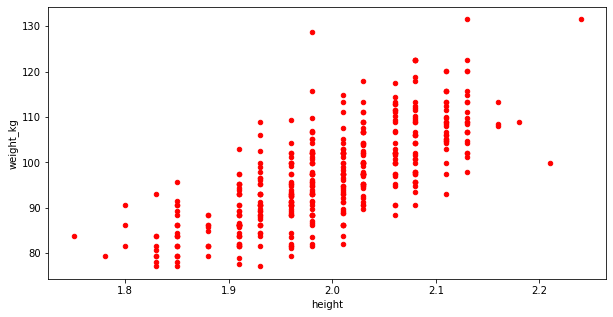

In [34]:
# Vamos a hacer un grafico sencillo y comun, un scatterplot, que nos permita ver la relacion 
# entre el peso y la altura
nba2k.plot.scatter(x = 'height', y = 'weight_kg', color = 'red')
# Existe relacion directa, a medida que el jugador es mas alto, es mas pesado

<AxesSubplot:xlabel='height', ylabel='salary'>

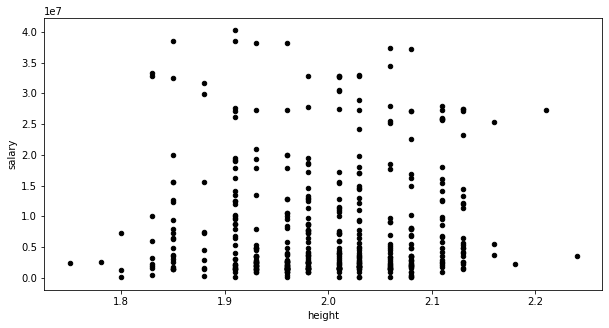

In [36]:
# Pero que pasa si combinamos la altura con el salario
nba2k.plot.scatter(x = 'height', y = 'salary', color = 'black')
# No existe un patron definido, los salarios son variables en base a la altura del jugador

<AxesSubplot:ylabel='Frequency'>

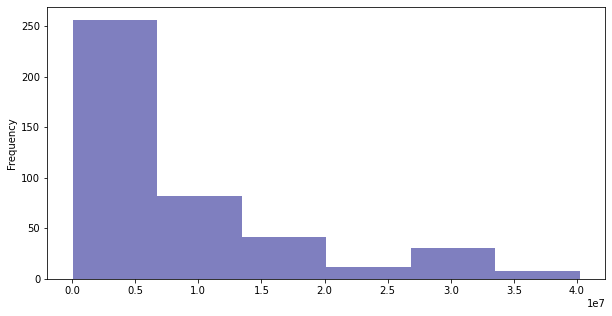

In [41]:
# Tambien podemos hacer un histograma, para ver como se distribuye la frecuencia del salario
nba2k['salary'].plot.hist(color = 'navy', alpha = 0.5, bins = 6)
# Los salarios estan representados en millones de dolares, asi que vemos como la mayoria de los jugadores
# gana entre 500.000 y 1.200.000 dolares

In [51]:
# Es interesante ver, como hay una gran cantidad de jugadores que cobran salarios entre 27 y 33 millones
nba2k[(nba2k['salary'] >= 27000000) & (nba2k['salary'] <= 33000000)].count()

id             28
full_name      28
rating         28
jersey         28
team           28
position       28
b_day          28
salary         28
country        28
draft_year     28
draft_round    28
draft_peak     28
college        26
version        28
height         28
weight_kg      28
dtype: int64

In [55]:
# Como tenemos tantos datos, los graficos de barra serán difícil de visualizar
# vamos a seleccionar solo un equipo, para que se aprecien mejor
nets = (nba2k['team'] == 'Brooklyn Nets')

In [58]:
nets = nba2k[nets]

In [83]:
nets.set_index('full_name', inplace = True)

<AxesSubplot:xlabel='full_name'>

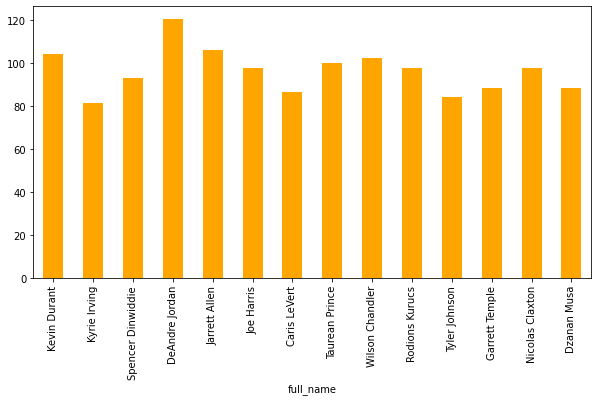

In [99]:
# Podemos ver la distribucion del peso de los jugadores
nets['weight_kg'].plot(kind = 'bar', color = 'orange') 

array([<AxesSubplot:title={'center':'height'}, xlabel='Jugador'>,
       <AxesSubplot:title={'center':'salary'}, xlabel='Jugador'>],
      dtype=object)

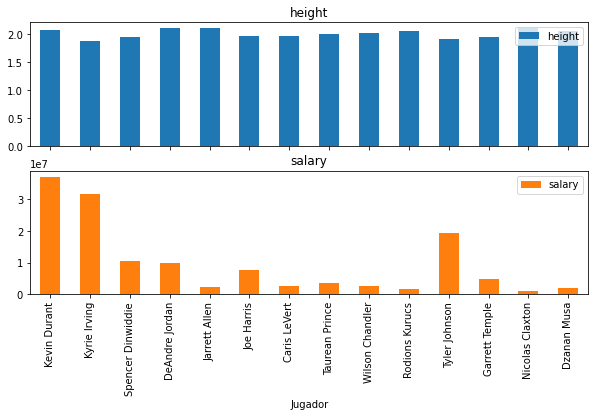

In [100]:
# Tambien podemos comparar la altura con el salario
nets[['height', 'salary']].plot.bar(subplots = True, xlabel = 'Jugador')

<AxesSubplot:>

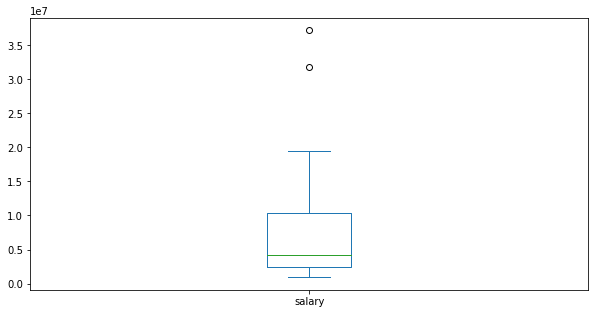

In [102]:
# Podemos hacer un diagrama de caja con el salario, que nos permita ver facilmente los outliers
# Esos dos outliers, son los sueldos de Durant e Irving
nets['salary'].plot.box()